In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from pandas import read_json

#Funkcja wywołująca zadana walutę w wybranym przedziale czasowym
def getTables(currency, startDate, endDate):
    getCurrencyRequest = requests.get('http://api.nbp.pl/api/exchangerates/rates/A/'+currency+'/'+startDate+'/'+endDate+'/')
    currencyData = getCurrencyRequest.json()['rates']
    prettyJson = json.dumps(currencyData,indent=4, sort_keys=True)
    return prettyJson

In [261]:
#Wywołanie funkcji
dollarsTables = getTables('USD', '2019-09-01', '2019-09-30')
euroTables = getTables('EUR', '2019-09-01', '2019-09-30')

In [262]:
#Ustawianie formatu daty, kodowania
dollarData = pd.DataFrame.from_dict(read_json(dollarsTables, convert_dates= True, encoding="UTF-8"))
euroData = pd.DataFrame.from_dict(read_json(euroTables, convert_dates= True, encoding="UTF-8"))


In [263]:
#Ustawianie indeksu na kolumnie z datą i wartością 
euroData.set_index(["effectiveDate", "mid"])
dollarData.set_index("effectiveDate", "mid")


                                  no
effectiveDate mid                   
2019-09-02    4.3691  169/A/NBP/2019
2019-09-03    4.3667  170/A/NBP/2019
2019-09-04    4.3385  171/A/NBP/2019
2019-09-05    4.3409  172/A/NBP/2019
2019-09-06    4.3392  173/A/NBP/2019
2019-09-09    4.3373  174/A/NBP/2019
2019-09-10    4.3350  175/A/NBP/2019
2019-09-11    4.3357  176/A/NBP/2019
2019-09-12    4.3400  177/A/NBP/2019
2019-09-13    4.3396  178/A/NBP/2019
2019-09-16    4.3262  179/A/NBP/2019
2019-09-17    4.3410  180/A/NBP/2019
2019-09-18    4.3419  181/A/NBP/2019
2019-09-19    4.3425  182/A/NBP/2019
2019-09-20    4.3438  183/A/NBP/2019
2019-09-23    4.3891  184/A/NBP/2019
2019-09-24    4.3796  185/A/NBP/2019
2019-09-25    4.3844  186/A/NBP/2019
2019-09-26    4.3861  187/A/NBP/2019
2019-09-27    4.3866  188/A/NBP/2019
2019-09-30    4.3736  189/A/NBP/2019
                  mid              no
effectiveDate                        
2019-09-02     3.9819  169/A/NBP/2019
2019-09-03     3.9882  170/A/NBP/20

In [264]:
#wyliczanie korelacji między walutami
np.corrcoef(dollarData['mid'], euroData['mid'])

array([[1.        , 0.95958617],
       [0.95958617, 1.        ]])

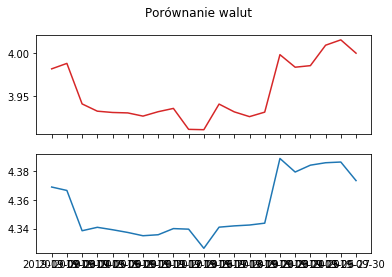

In [265]:
#wykresy z walutami
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Porównanie walut')
ax1.plot(dollarData['effectiveDate'], dollarData['mid'],'tab:red')
ax2.plot(euroData['effectiveDate'], euroData['mid'])